# Fashion Classification 

# Problem statement 

The data set for this project consists of 70,000 images whihc is divided into 60,000 training sample and 10,000 testing sample. Each image is on 28x28 grayscale with 1 out of 10 label classes.
The 10 classes are listed below:
0 - T-shirt/top
1 - Trouser 
2 - Pullover 
3 - Dress 
4 - Coat 
5 - Sandal
6 - Shirt 
7 - Sneaker
8 - Bag
9 - Ankle Boot

The image has a width and height of 28 pixel which comes up to 784 pixels in total. Each pixel has a pixel value which translates to the grey shade. The values ranges from 0 to 255. The higher the value, the darker the pixel is.



# Importing data 

In [11]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random #random give random values within a set range

In [12]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep= ',')

In [13]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep= ',')

# Data Visualization 

In [14]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [18]:
fashion_train_df.shape

(60000, 785)

In [19]:
fashion_test_df.shape

(10000, 785)

In [20]:
training = np.array(fashion_train_df, dtype = 'float32')# data type float 32

In [21]:
testing = np.array(fashion_test_df, dtype = 'float32')# data type float 32

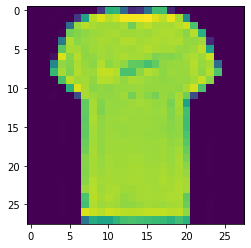

In [22]:
plt.imshow(training[10, 1:].reshape(28,28)) #imshow shows image and reshape show the image in the given dimension 

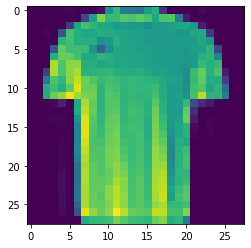

In [23]:
plt.imshow(training[600, 1:].reshape(28,28))

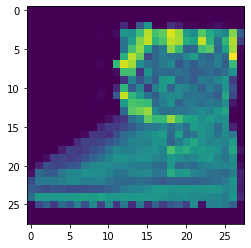

In [24]:
plt.imshow(training[12,1:].reshape(28,28))

9.0

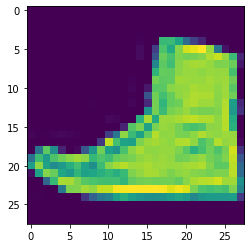

In [25]:
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

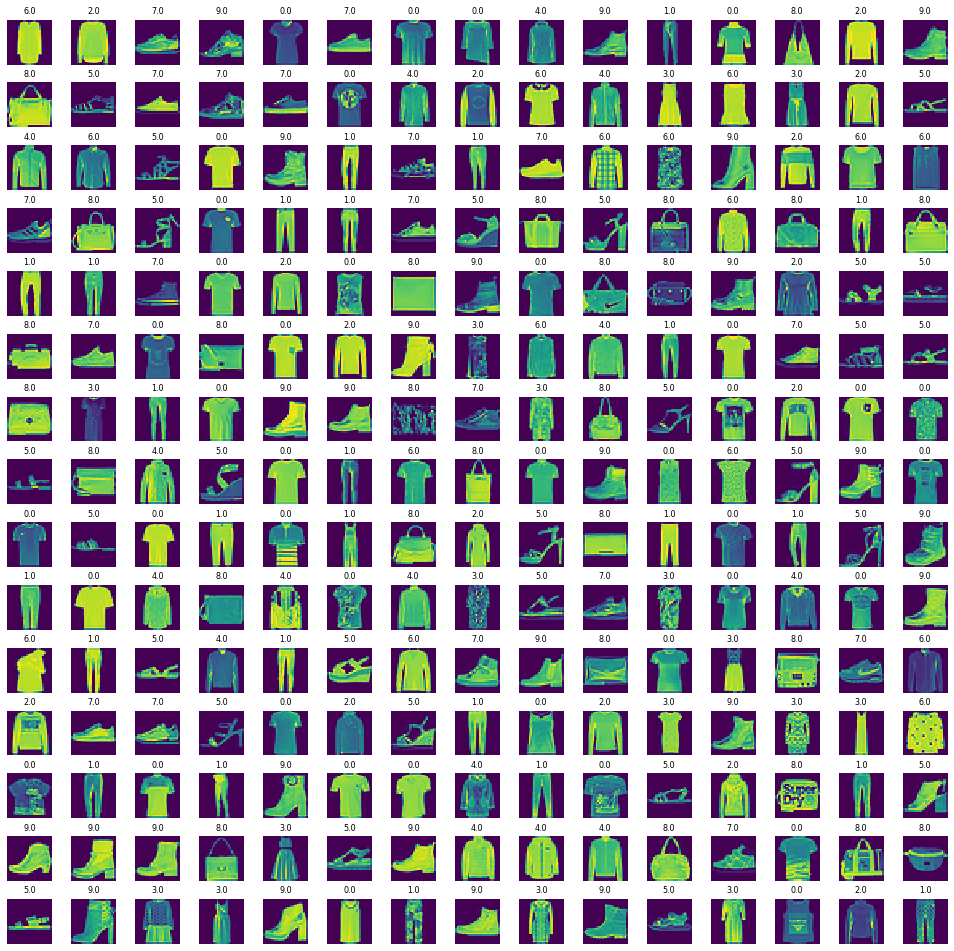

In [26]:
# to view images on grid format
# to define dimensions of the grid to be ploted
w_grid = 15 #width of the grid
l_grid = 15 #length of the grid 

fig, axes = plt.subplots(l_grid,w_grid, figsize = (17,17)) # plot returns figure object and axes object

axes = axes.ravel() #flaten the 15x15 matrix into 225 array, which means converting 2d objects to vectors to feed into the model

n_training = len(training)# to get the length of the training dataset


#to get a random value from 0 to n_training
for i in np.arange(0, w_grid * l_grid): # to get each variable/box within the grid evenly spaced
    index = np.random.randint(0, n_training)# to genrate random values/random images from 0 to the lenght of training 
    #read and display the image according the choosen index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8) # to get the target class
    axes[i].axis('off') #show not show the axis details like pixel numbers
    
plt.subplots_adjust(hspace = 0.4) #set the height among the images 

# Training the Model

In [27]:
x_train = training [:, 1:]/255 # taking all rows, and all cloumns from 1 to n and to normalise the pixel values ranging from 0 - 255 to 0-1

In [28]:
y_train = training [:, 0] # only returning column 0 whihc has the traget class 

In [29]:
x_test = testing [:, 1:]/255 # taking all rows, and all cloumns from 1 to n and to normalise the pixel values ranging from 0 - 255 to 0-1

In [30]:
y_test = testing [:, 0] # only returning column 0 whihc has the traget class 

In [31]:
# to make a validate sets for x and y to use during training to generalize the model and avoid overfitting. This is seperate from training and test set but split from x_train and y_train
from sklearn.model_selection import train_test_split 
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [32]:
x_train.shape

(48000, 784)

In [33]:
y_train.shape

(48000,)

In [34]:
# to reshape all the arrays within eash set to 28 by 28 dimension 
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1))

In [35]:
x_train.shape


(48000, 28, 28, 1)

In [36]:
x_test.shape

(10000, 28, 28, 1)

In [37]:
x_validate.shape

(12000, 28, 28, 1)

In [38]:
import keras

In [39]:
import keras
from keras.models import Sequential # the network needs to built in a sequnetial format 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Dense to create the connected network
from keras.optimizers import Adam 
from keras.callbacks import TensorBoard


In [40]:
cnn_model = Sequential() 
#trying 32 filters first then 64
cnn_model.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation = 'relu'))# first layer is the convulational layer by adding (32,(3,3),and give 32 kernals and reshape with 28 x 28 dimensions with relu activation function
cnn_model.add(MaxPooling2D(pool_size = (2,2))) # 2,2 is the size of the pool
cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())# to get one single array to feed into the network 
cnn_model.add(Dense( activation = 'relu', units = 32)) # this specifies the hidden layer and avoid out_dim and use units 
cnn_model.add(Dense( activation = 'sigmoid',  units = 10))# this specifies the output player and avoid out_dim and use units 


In [42]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [43]:
epochs = 50

In [44]:
cnn_model.fit(x_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, validation_data = (x_validate, y_validate))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 10s 212us/step - loss: 0.8365 - accuracy: 0.7277 - val_loss: 0.4903 - val_accuracy: 0.8279
Epoch 2/50
48000/48000 [==============================] - 9s 197us/step - loss: 0.4695 - accuracy: 0.8349 - val_loss: 0.4111 - val_accuracy: 0.8574
Epoch 3/50
48000/48000 [==============================] - 9s 194us/step - loss: 0.4113 - accuracy: 0.8565 - val_loss: 0.3749 - val_accuracy: 0.8729
Epoch 4/50
48000/48000 [==============================] - 12s 259us/step - loss: 0.3777 - accuracy: 0.8690 - val_loss: 0.3525 - val_accuracy: 0.8789
Epoch 5/50
48000/48000 [==============================] - 12s 244us/step - loss: 0.3597 - accuracy: 0.8738 - val_loss: 0.3674 - val_accuracy: 0.8708
Epoch 6/50
48000/48000 [==============================] - 12s 248us/step - loss: 0.3416 - accuracy: 0.8804 - val_loss: 0.3337 - val_accuracy: 0.8823
Epoch 7/50
48000/48000 [==============================] - 